In [1]:
#Load Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import pdist
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\Pradeep\\Downloads')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Pradeep\\Downloads'

In [5]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# Load data set and display first few observations
df = pd.read_csv("pima-indians-diabetes.data", names = names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Check data info and dimension
df.info()
#No missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Check distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
# Removing the first column cultivator
X=df.iloc[:,0:7]

In [10]:
#Keep cultivator as seprate file
Y=df.loc[:,'class']

In [11]:
#Check the new data dimension
X.shape

(768, 7)

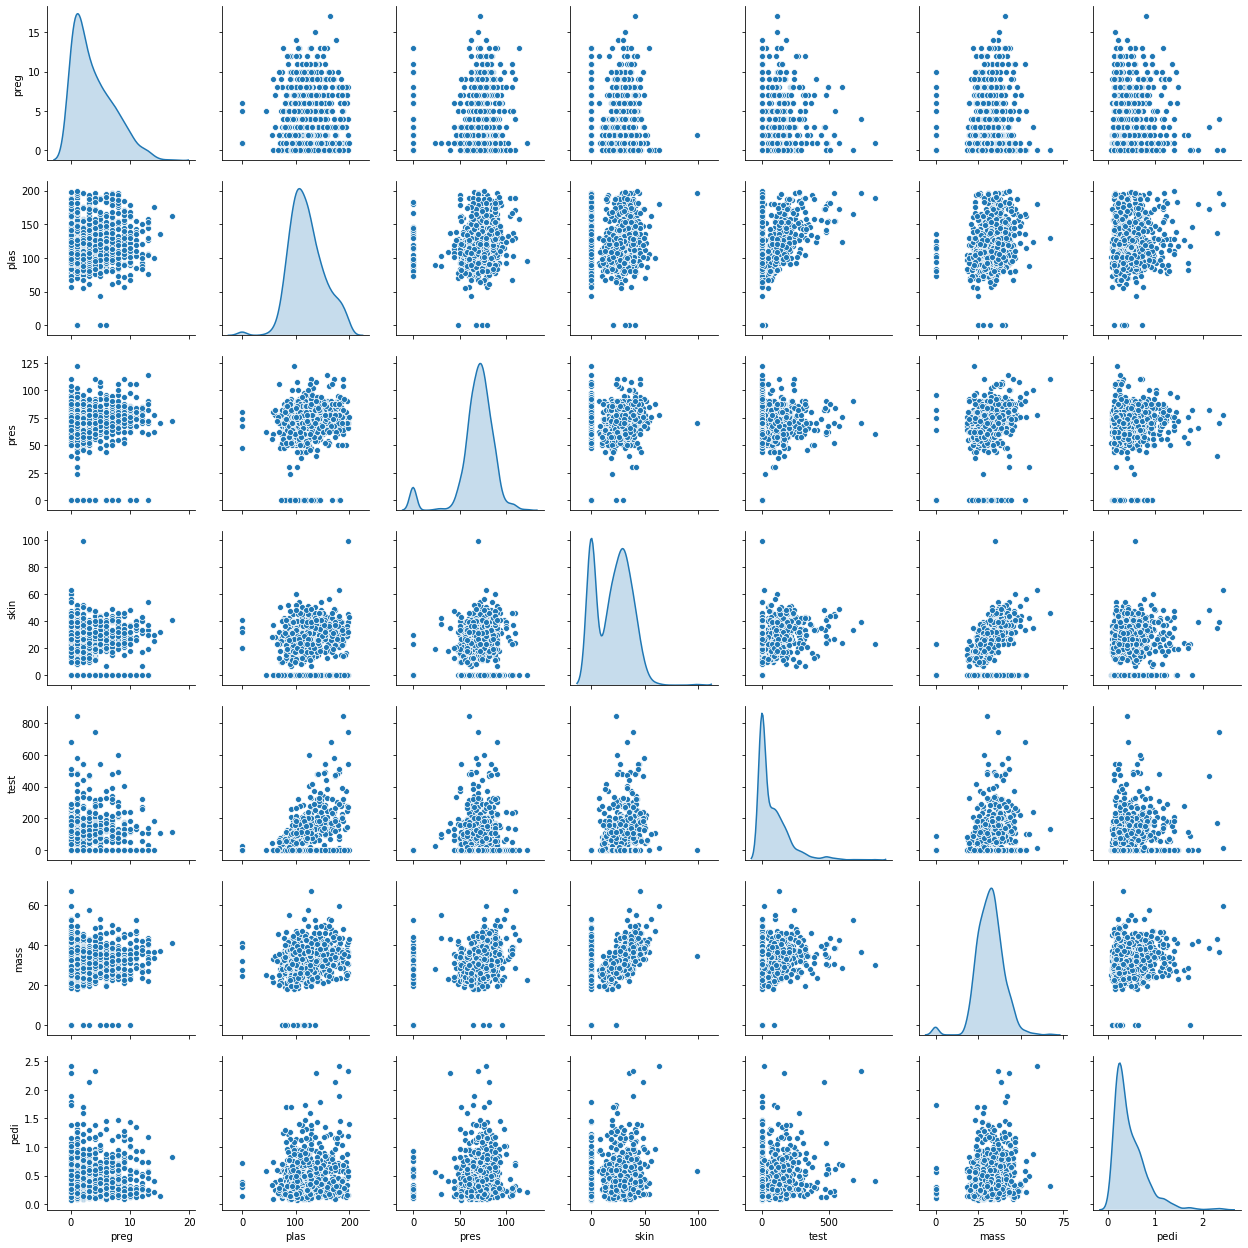

In [12]:
sns.pairplot(X,diag_kind='kde')
#most of the data are approximately normally distributed
# Add more insights

In [13]:
def correlation_heat_map(dff):
    corrs = dff.corr()

    # Set the figure size
    fig, ax = plt.subplots(figsize=(20,18))

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    plt.show()

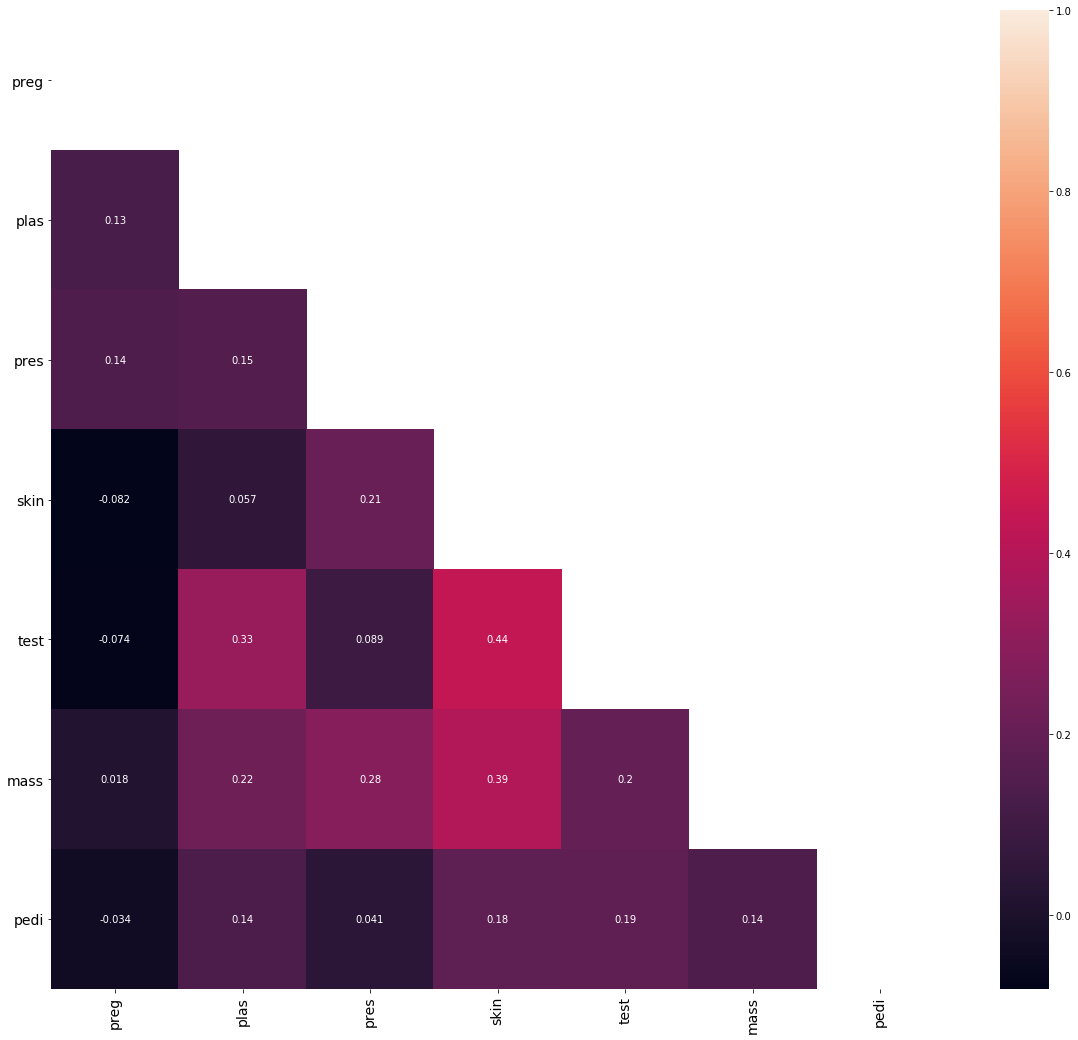

In [14]:
correlation_heat_map(X)
#Total_phenols needs to be watched. Add more insights

In [20]:
###Scale the data points before doing K means( Required)
from scipy.stats import zscore
X_scaled = X.apply(zscore)

In [21]:
# check the data points
X_scaled.head(2)

,preg,plas,pres,skin,test,mass,pedi
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061


In [22]:
#Buils required K Means cluster
kmeans = KMeans(n_clusters=2,random_state=101)

In [23]:
#Fit it on our data
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [24]:
# Check Centroid values for each cluster and store it in new data frame
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_scaled))
centroid_df

,preg,plas,pres,skin,test,mass,pedi
0,-0.032101,-0.332599,-0.197184,-0.560158,-0.470193,-0.371069,-0.184687
1,0.047943,0.496739,0.294495,0.836599,0.702237,0.554195,0.275832


In [25]:
#create a new dataframe for labels and converting it
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['cluster_number']))
df_labels['cluster_number'] = df_labels['cluster_number'].astype('category')

In [26]:
# Join the label dataframe with the raw data frame
X_cluster = X.join(df_labels)
X_cluster.head()

,preg,plas,pres,skin,test,mass,pedi,cluster_number
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,0
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [28]:
df_labels.cluster_number.value_counts()

0    460
1    308
Name: cluster_number, dtype: int64

* Hierarchical Clustering (K=3) with the best linkage method and show the 3D cluster plot with the most appropriate attributes in X,Y and Z –axis. 

In [31]:
#Use Cophenet index to find best linkage method

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering,it represents the tightness of the clusters 

In [32]:
Z = linkage(X_scaled, method='complete')
c, coph_dists = cophenet(Z , pdist(X_scaled))
c

0.6136211376083051

In [33]:
Z = linkage(X_scaled, method='single')
c, coph_dists = cophenet(Z , pdist(X_scaled))
c

0.7523442429309172

In [34]:
Z1 = linkage(X_scaled, method='average')
c, coph_dists = cophenet(Z , pdist(X_scaled))
c

0.7523442429309172

In [35]:
Z = linkage(X_scaled, method='ward')
c, coph_dists = cophenet(Z , pdist(X_scaled))
c

0.3542665771029849

In [36]:
Z = linkage(X_scaled, method='centroid')
c, coph_dists = cophenet(Z , pdist(X_scaled))
c
#centroid method seems to be having good score than others

0.7713089706391066

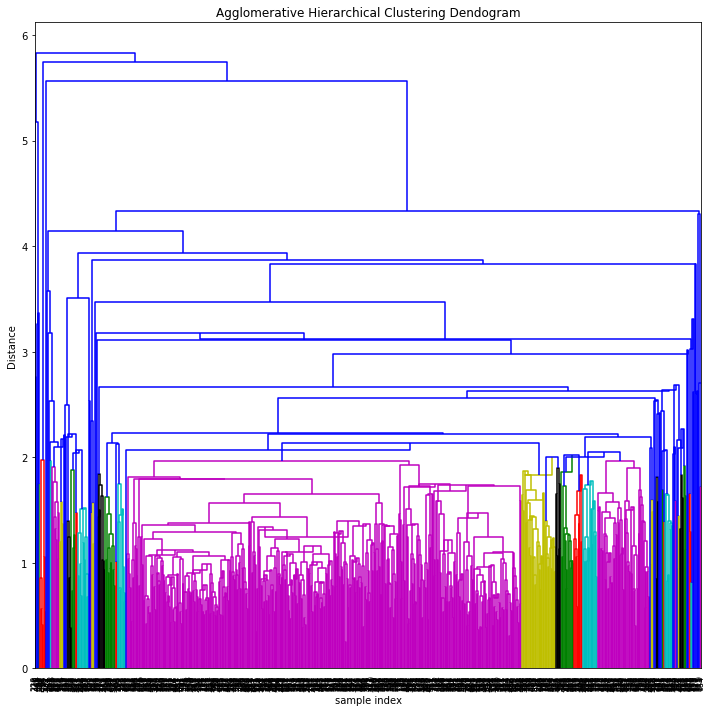

In [37]:
#Plot dendogram
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold=2, leaf_font_size=8. )
plt.tight_layout()

In [39]:
#build the model using average/ward/complete method
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')

In [40]:
#Train it
model.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [41]:
X_scaled['cluster_labels'] = model.labels_
X_scaled['cluster_labels'].value_counts()

0    764
1      4
Name: cluster_labels, dtype: int64

Text(0.5, 0.92, '3D plot of Hierarchical Clustering')

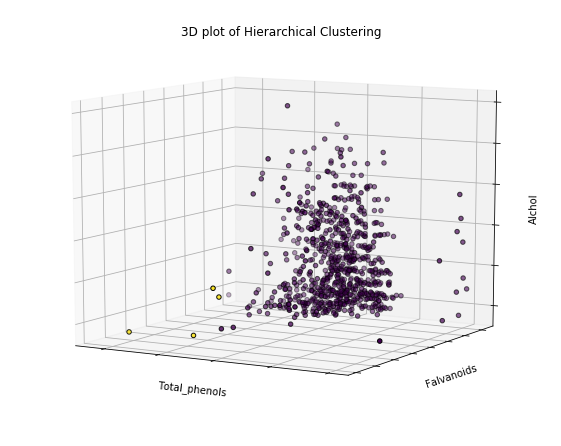

In [42]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=120) # elev and azim can change view 
model.fit(X_scaled)
labels = model.labels_
ax.scatter(X_scaled.iloc[:, 5], X_scaled.iloc[:, 6], X_scaled.iloc[:, 0],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Total_phenols')
ax.set_ylabel('Falvanoids')
ax.set_zlabel('Alchol')
ax.set_title('3D plot of Hierarchical Clustering')

In [43]:
# Standardize feature to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
X_std.shape

(768, 7)

In [44]:
# Obtain covariance matrix for X_std
cov_matrix = np.cov(X_std, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378]]


In [45]:
#Calculate eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 13x13 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 13x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.01382229  0.72650969  0.05074542 -0.16349614  0.16208571  0.63146047
   0.13293768]
 [ 0.35483833  0.29293916 -0.41488904 -0.59359342 -0.29597429 -0.40902578
   0.09427339]
 [ 0.32227121  0.44735276  0.06479024  0.43100754  0.09397945 -0.30570619
  -0.63542355]
 [ 0.49529646 -0.26310232 -0.62302974  0.32434368 -0.04432123  0.43599509
   0.00613273]
 [ 0.47450231 -0.24400252  0.56323536 -0.29519863 -0.37764252  0.30366294
  -0.27587854]
 [ 0.46633394  0.1062078   0.3386755   0.33600299  0.06222881 -0.23513162
   0.69605614]
 [ 0.28653377 -0.21495504  0.03151165 -0.36042933  0.85372398 -0.05394003
  -0.09505935]]

Eigenvalues of Cov(X): 
[2.07088258 1.20754482 0.40622572 1.01790376 0.8705362  0.75325257
 0.68278082]


In [46]:
# Make pair of eigenvalue, eigenvector
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Do it in descending ordered
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# sorted eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[2.0708825784250395, 1.207544815472435, 1.017903760918883, 0.8705362013131139, 0.7532525745035569, 0.6827808170630089, 0.40622571905754845]


In [47]:
#Cumulative Variance
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 29.54551595  46.7736944   61.29624248  73.71628092  84.46302059
  94.20433172 100.        ]


In [49]:
# Keep the first 7 principal components 
# P_reduce is 13 x 7 matrix
P_reduce = np.array(eigvectors_sort[0:7]).transpose()
# The projected data in 2D will be n x 7 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

In [50]:
X_std.shape, P_reduce.shape, Proj_data_2D.shape

((768, 7), (7, 7), (768, 7))

In [51]:
from sklearn import model_selection

test_size = 0.30
seed = 11 
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_2D, Y, test_size=test_size, random_state=seed)

In [52]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict= model.predict(X_test)
acc=metrics.accuracy_score(y_test, y_predict)
print(acc)

0.7792207792207793


C:\Users\DILIP\AppData\Local\Continuum\anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
cm= metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[138  11]
 [ 40  42]]


In [54]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.93      0.84       149
           1       0.79      0.51      0.62        82

    accuracy                           0.78       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231



* Compare the above (e) results with fitting a Logistic Regression model for the original dataset (178 x 13) without applying PCA.  [with 70% & 30% split]

In [55]:
from sklearn import model_selection

test_size = 0.30
seed = 77
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, Y, test_size=test_size, random_state=seed)

In [56]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict= model.predict(X_test)
acc=metrics.accuracy_score(y_test, y_predict)
print(acc)

0.7619047619047619


C:\Users\DILIP\AppData\Local\Continuum\anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
cm= metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[134  24]
 [ 31  42]]


In [58]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       158
           1       0.64      0.58      0.60        73

    accuracy                           0.76       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.76      0.76      0.76       231

